
060_098_000_057


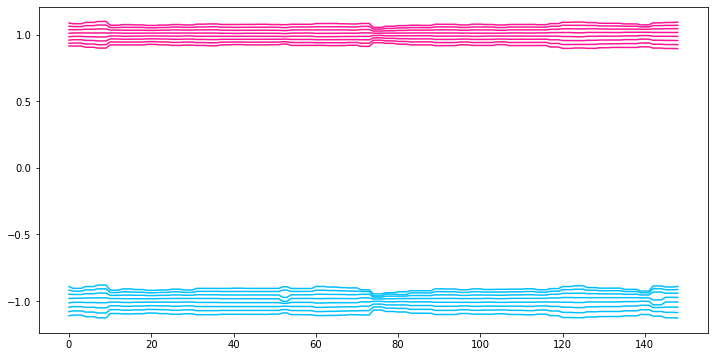

061_096_000_057


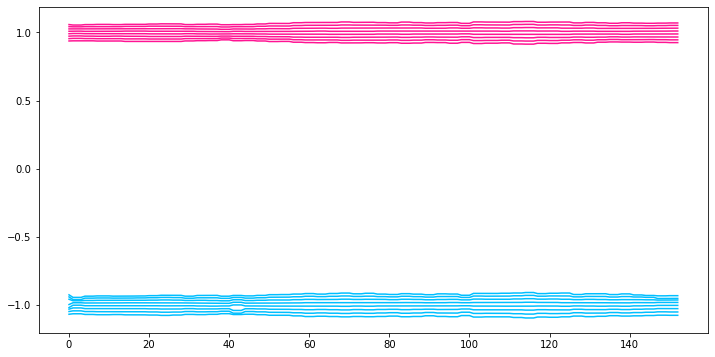

062_096_000_061


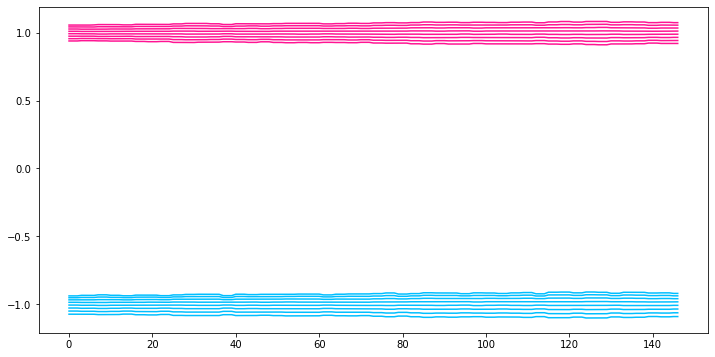

062_097_000_058


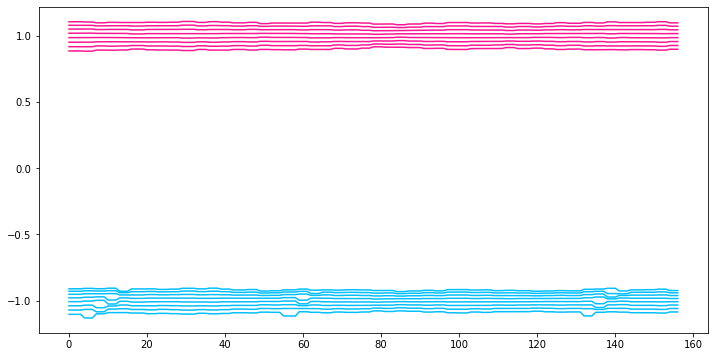

062_098_000_057


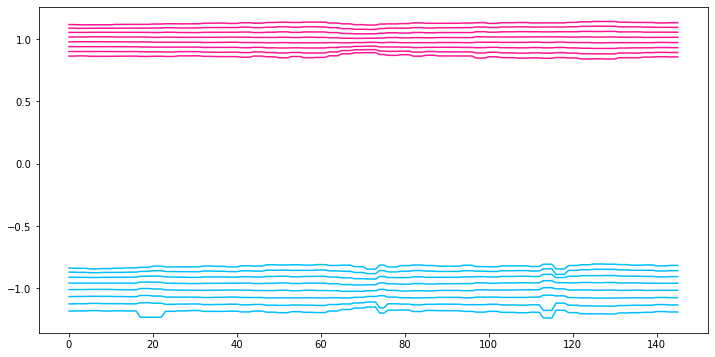

063_097_000_064


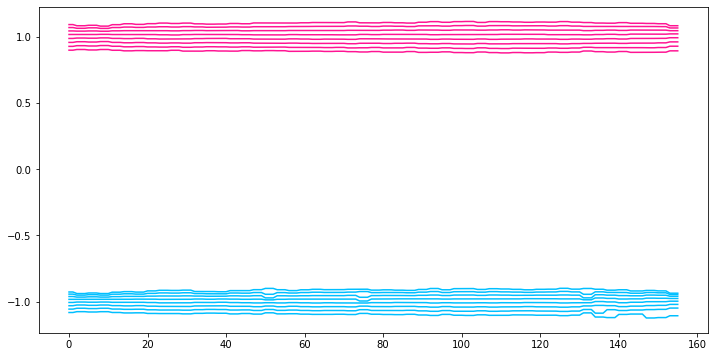

064_097_003_079


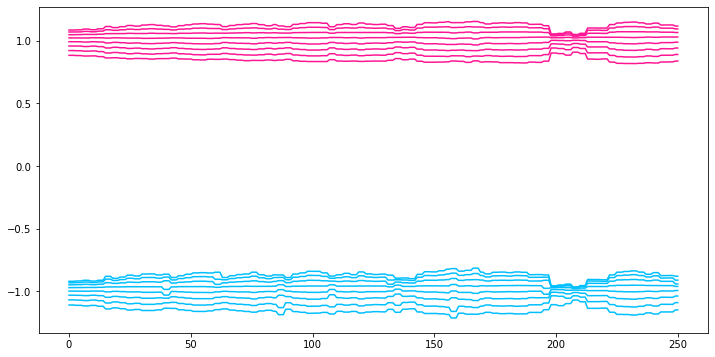

065_099_002_072


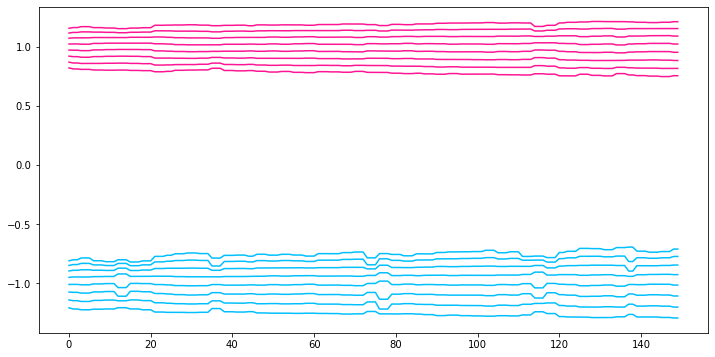

065_099_002_075


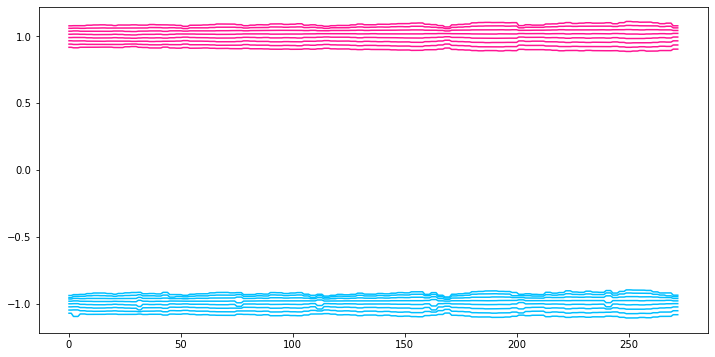

067_099_002_031


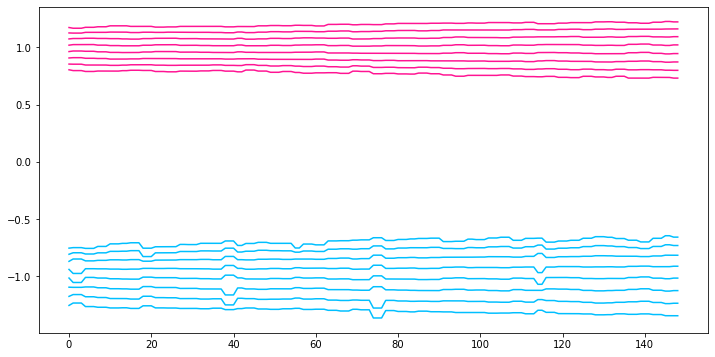

068_097_001_065


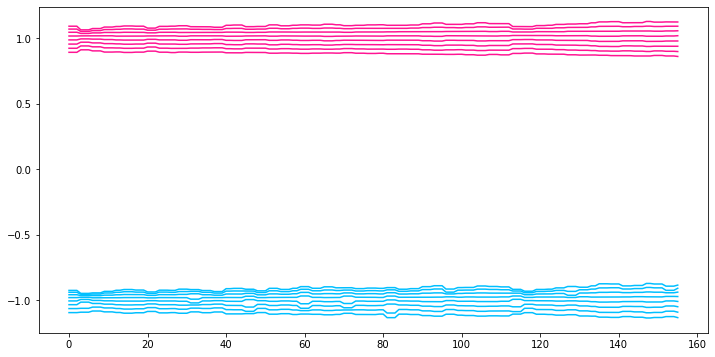

068_098_001_081


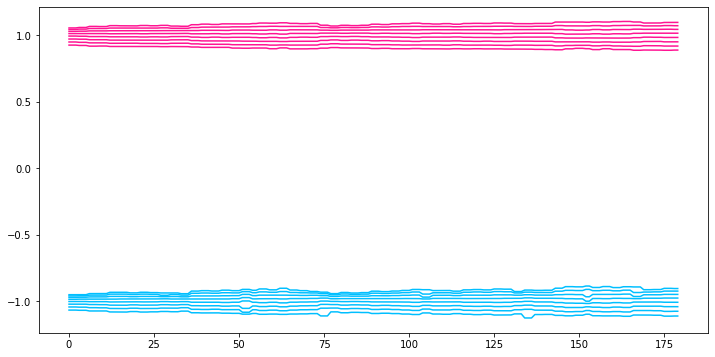

069_098_000_074


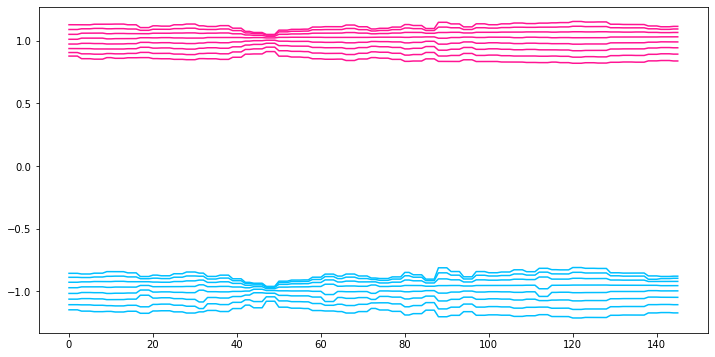

069_099_002_038


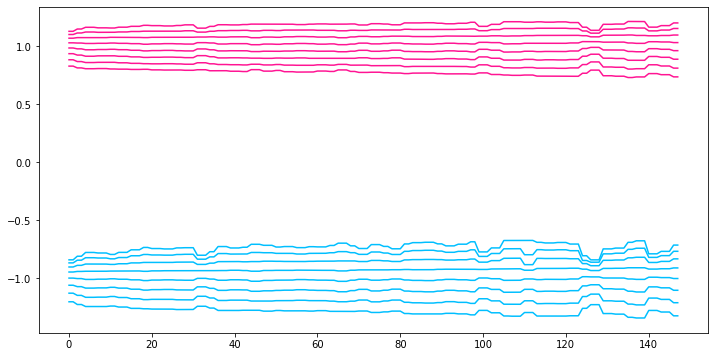

070_099_002_045


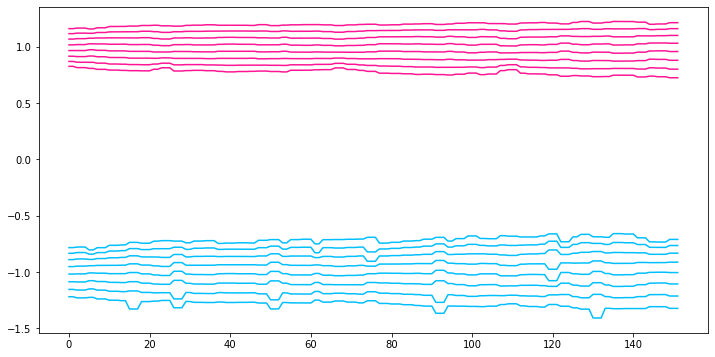

071_098_000_106


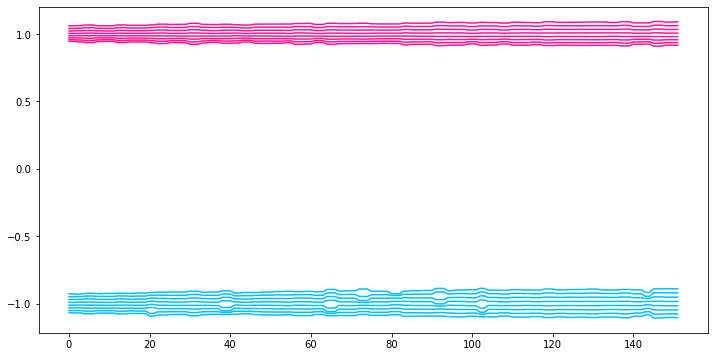

072_097_000_059


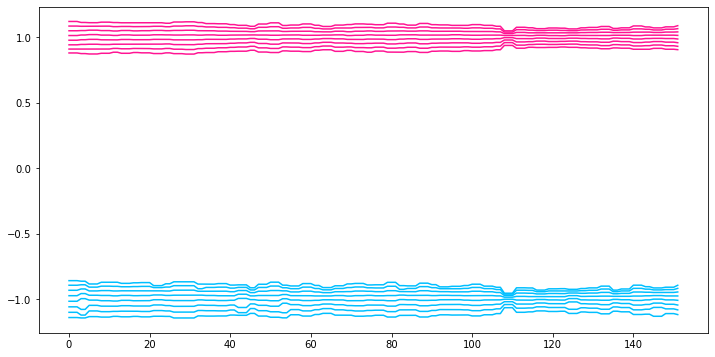

072_098_000_101


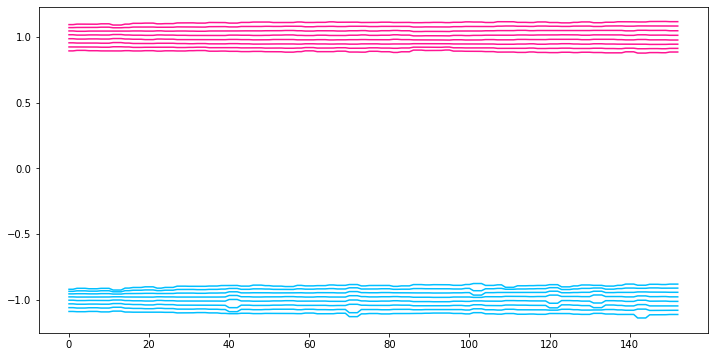

072_098_005_097


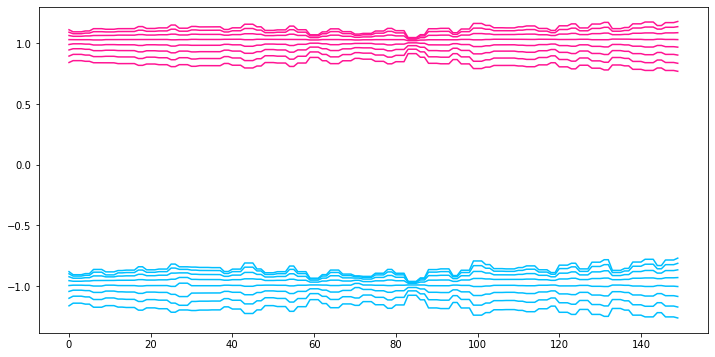

073_097_000_093


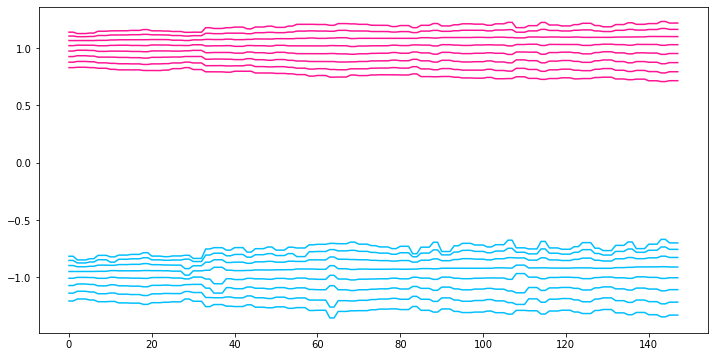

073_098_000_056


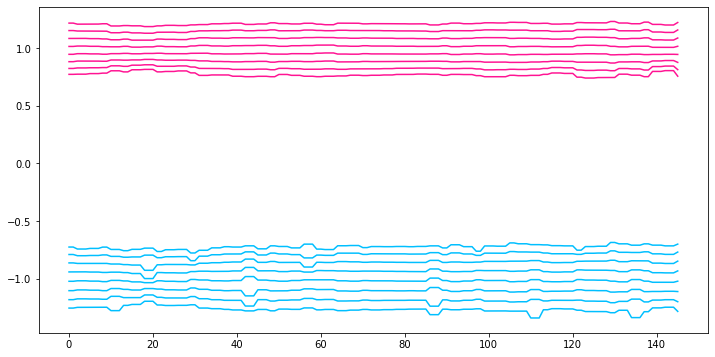

073_098_000_074


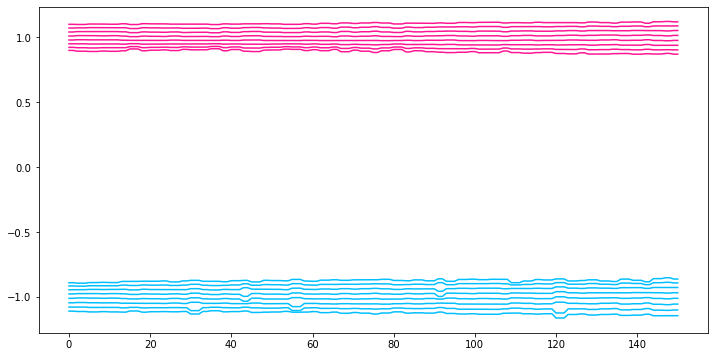

075_097_000_057


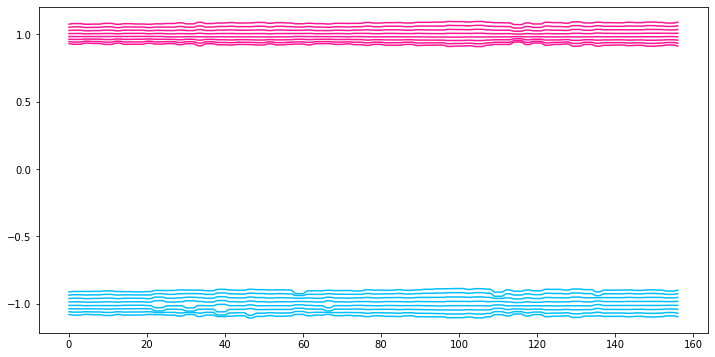

075_098_000_061


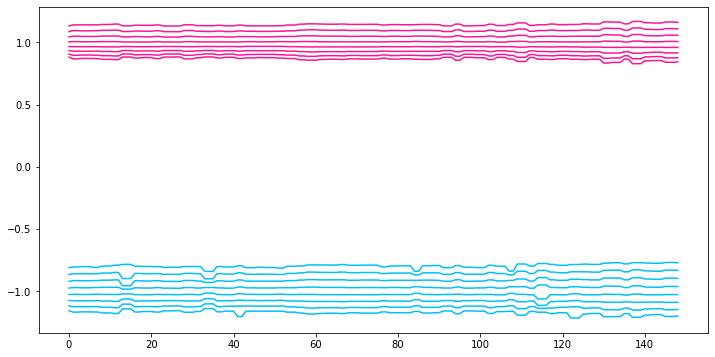

075_098_000_105


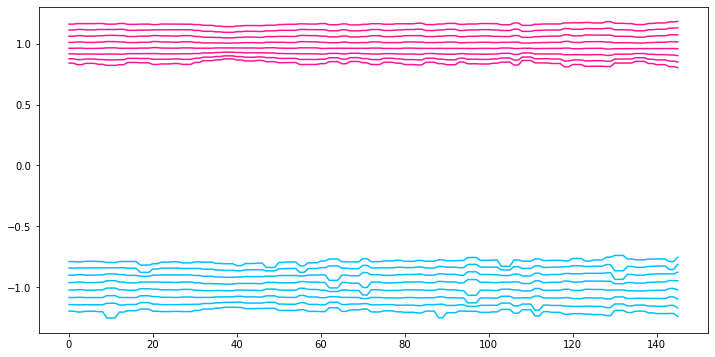

076_097_000_092


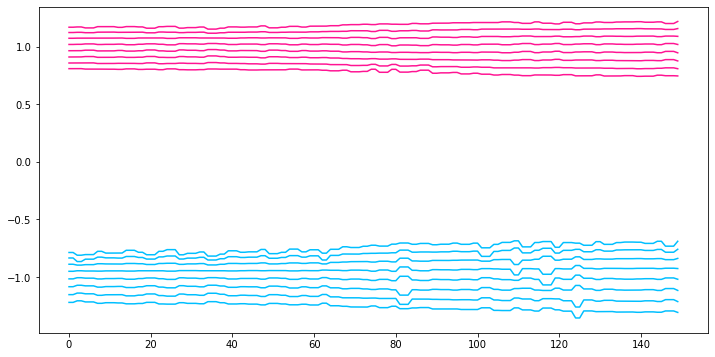

076_098_000_089


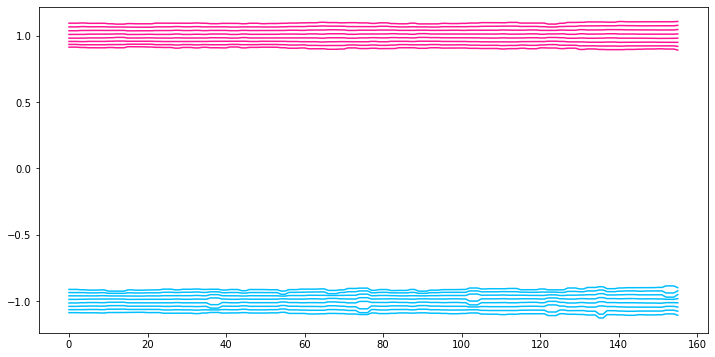

076_099_000_083


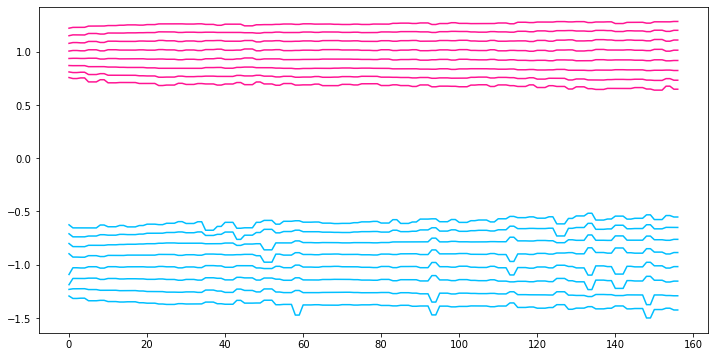

076_099_000_089


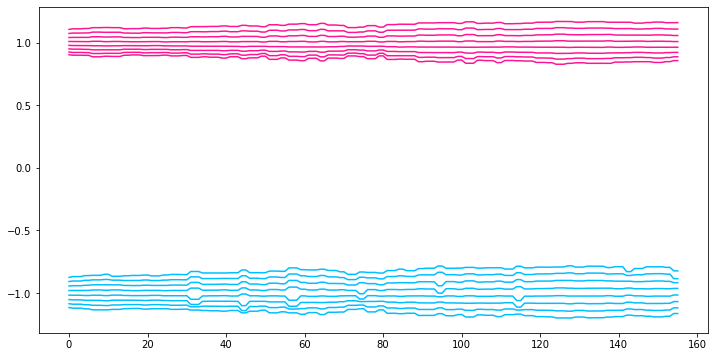

077_098_000_061


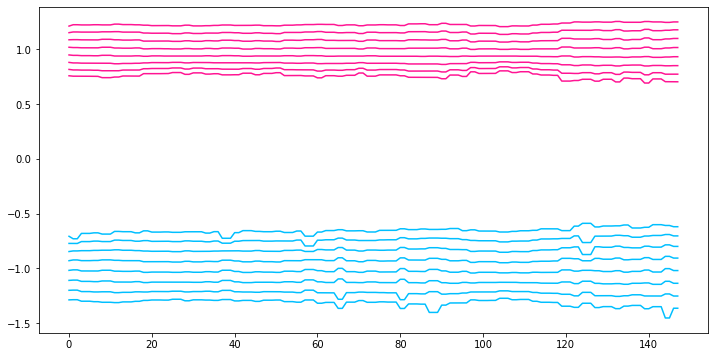

080_099_000_076


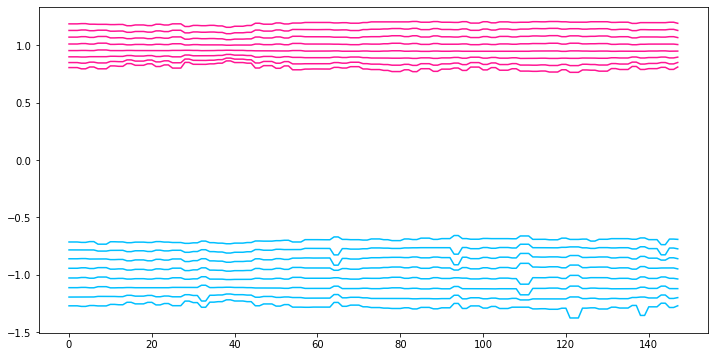

080_099_000_089


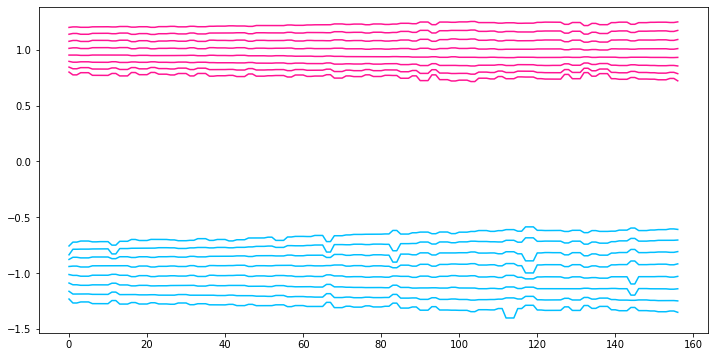

082_099_000_078


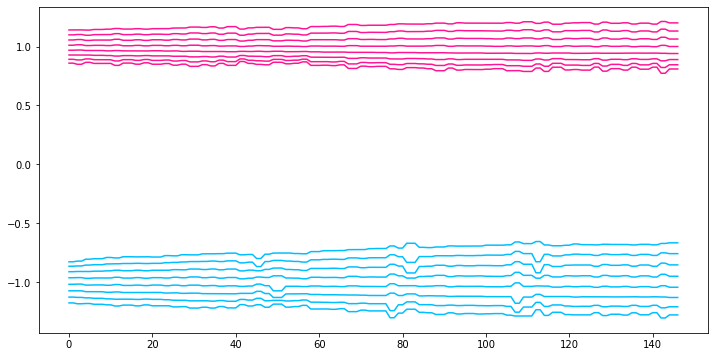

083_099_000_078


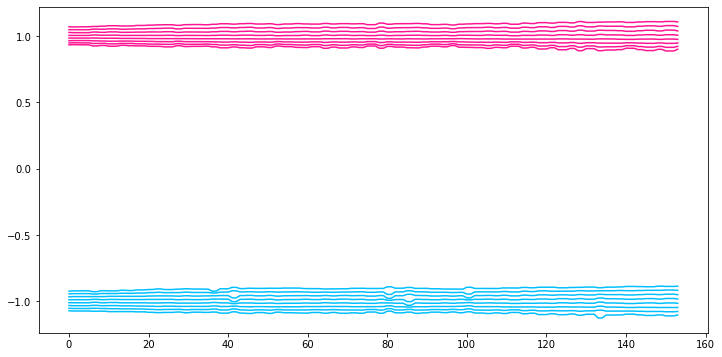

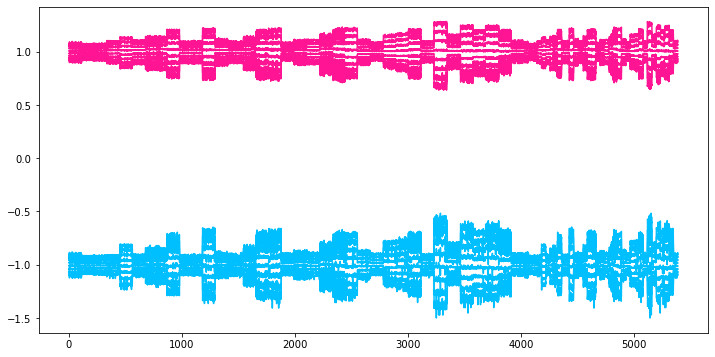

(4042, 16) (4042, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
43/43 - 0s - loss: 157.5478 - mae: 7.9165
0 .Test loss: [157.5477752685547, 7.916509628295898]
43/43 - 0s - loss: 157.0809 - mae: 7.8023
1 .Test loss: [157.08090209960938, 7.802323818206787]
43/43 - 0s - loss: 157.7021 - mae: 7.8509
2 .Test loss: [157.70211791992188, 7.850884914398193]
43/43 - 0s - loss: 156.7363 - mae: 7.7963
3 .Test loss: [156.736328125, 7.796313

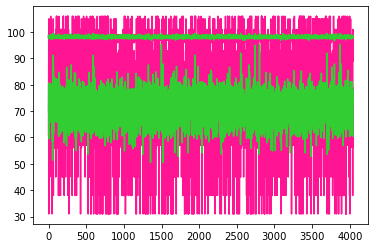

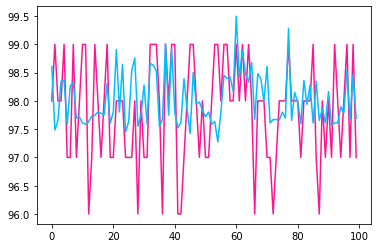

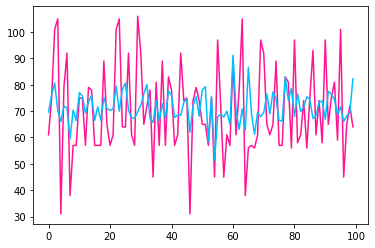

In [1]:
### keras 2.3, tensorflow 2.0
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import os, sys
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model


import shutil
try:
    shutil.rmtree(r'data1\.ipynb_checkpoints')
except:
    print('')

def sao2data9(sao2file, file):
    print(file)
    wd = np.loadtxt(sao2file)
    
    wd = np.delete(wd, np.s_[::17])   
    

    
    global SEG
    SEG = 16
  
    seg = len(wd)//SEG 

    xdata = wd[: seg*SEG].reshape(-1,SEG)
    
 
    for i in range(seg):
        m = xdata[i].mean()
        s = xdata[i].std()

        xdata[i] -= m
        xdata[i] /= s

    ydata = []    
    for i in range(seg): 
     
        ydata = np.append(ydata, int(file[4:7]))
        ydata = np.append(ydata, int(file[12:15]))
        
    ydata = ydata.reshape(-1, 2)
 
    plt.figure(figsize=(12,6))
    plt.plot(xdata[:,0::2], color='deepskyblue', label='xdata')
    plt.plot(xdata[:,1::2], color='deeppink', label='xdata')
    plt.show()

    xtr, xte, ytn, yten = train_test_split(xdata, ydata)#, test_size=0.030, random_state=42)

    return (xtr, ytn), (xte, yten)

def getdata4():
    path = r'data1\\'

    dirs = os.listdir( path )
    
    train_data = np.empty((0, 16))
    train_targets = np.empty((0, 2))
    test_data = np.empty((0, 16))
    test_targets = np.empty((0, 2)) 
    
    for file in dirs:
        (x_train, y_train_num), (x_test, y_test_num) = sao2data9(os.path.join(path, file), file)
        train_data = np.append(train_data, x_train, axis = 0)
        train_targets = np.append(train_targets, y_train_num, axis = 0)
        test_data = np.append(test_data, x_test, axis = 0)
        test_targets = np.append(test_targets, y_test_num, axis = 0)
  
    xdata = np.append(train_data, test_data, axis = 0)
    ydata = np.append(train_targets, test_targets, axis = 0)
    #xdata = xdata/10000.
    ydata = ydata


    plt.figure(figsize=(12,6))
    plt.plot(xdata[:,0::2], color='deepskyblue', label='xdata')
    plt.plot(xdata[:,1::2], color='deeppink', label='xdata')
    plt.show()
    
    train_data, test_data, train_targets, test_targets = train_test_split(xdata, ydata)#, test_size=0.30, random_state=42)
    return train_data, test_data, train_targets, test_targets
    
###--------main--------------------------------------

x_scale, testd, y, testt = getdata4()

# x_scale = x_scale[:50]
# y = y[:50]

print(x_scale.shape, y.shape)


model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (SEG,)))
#model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(2))#, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'rmsprop',metrics=['mae'])

# ### CNN model 
# x_scale = x_scale.reshape(x_scale.shape[0], 4, 4, 1)
# testd = testd.reshape(testd.shape[0], 4, 4, 1)

# inputs = Input(shape=x_scale.shape[1:])
# x = Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='same')(inputs)
# x = ReLU()(x)
# x = MaxPool2D((2,2),strides=(2,2), padding="same")(x)

# x = Conv2D(8 ,kernel_size=(2,2), strides=(1,1), padding="same")(x)
# x = ReLU()(x)
# x = MaxPool2D((2,2),strides=(2,2), padding="same")(x)

# #     x = Conv2D(48, kernel_size=(3,3), strides=(1,1), padding="same")(x)
# #     x = ReLU()(x)
# #     x = Dropout(0.2)(x)
# #     x = MaxPool2D((2,2),strides=(2,2), padding="same")(x)

# x = Flatten()(x)
# x = Dense(2)(x)
# predictions = (x)

# model = Model(inputs=inputs, outputs=predictions)
# model.compile(loss = 'mse', optimizer = RMSprop(),)

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(2, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

x_scale = x_scale.reshape(x_scale.shape[0], 16)
testd = testd.reshape(testd.shape[0], 16)

#model = make_model(input_shape=x_scale.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)
# model.compile(
#     optimizer="adam",
#     loss="sparse_categorical_crossentropy",
#     metrics=["sparse_categorical_accuracy"],
# )
model.compile(loss = 'mse', optimizer = 'rmsprop',metrics=['mae'])

model.summary()

lastscore = 1        
for i in range(30):
    model.fit(x_scale, y, batch_size = 128, epochs = 200, verbose =0)#, callbacks=callback_lists )

    # Score trained model.
    scores = model.evaluate(testd, testt, verbose=2)
    print(i,'.Test loss:', scores)
    if(scores[1] < lastscore):
        lastscore = scores[1]
        model.save('glucose-'+str(scores[1])[:5]+'.h5')
        
y_hap = model.predict(x_scale)
#print(np.sum(np.square(y-y_hap)))
plt.plot(np.arange(len(y)),y,'deeppink')
plt.plot(np.arange(len(y_hap)),y_hap,'limegreen')
#plt.legend(loc = 'best')
plt.show()

plt.plot(y[:100,0],'deeppink')
plt.plot(y_hap[:100,0],'deepskyblue')
plt.show()
plt.plot(y[:100,1],'deeppink')
plt.plot(y_hap[:100,1],'deepskyblue')
#plt.legend(loc = 'best')
plt.show()